<a href="https://colab.research.google.com/github/stephenbeckr/numerical-analysis-class/blob/master/Demos/Ch2_Intersection_GraphingCalculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finding the intersection of two functions

This is something you might have done in high school on a graphing calculator (the particular functions we're using are inspired by this [post about using the TI-84+](https://www.dummies.com/education/graphing-calculators/how-to-find-points-of-intersection-on-the-ti-84-plus/)).

![TI-84 image](https://github.com/stephenbeckr/numerical-analysis-class/raw/master/Demos/img/398635.image0.jpg)

Let's find the intersection of
$$ f(x) = .2(x-2)x(x+4)  \quad\text{and}\quad g(x) = .5 x $$

First, let's plot the functions:
(for plotting, here's a list of [style sheets](https://matplotlib.org/3.3.1/gallery/style_sheets/style_sheets_reference.html) to use with `plt.style.use`, and [general matplotlib cheatsheets](https://github.com/matplotlib/cheatsheets); if you want to make the axes through the origin, like in the TI-84 picture, this [stackoverflow post](https://stackoverflow.com/a/25689340) gives several methods)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-notebook')

# == First, define the function f
# f = lambda x : [TODO]
f = lambda x : .2*(x-2)*x*(x+4)
# or
# def f(x):
#   return [TODO]

# == Now, define g
g = lambda x : .5*x


# == Now, plot

x   = np.linspace(-10,10,100)

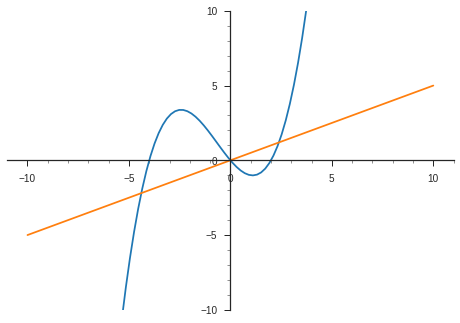

In [52]:
fig, ax = plt.subplots()
ax.plot( x, f(x) )
ax.plot( x, g(x) )
ax.set_ylim(-10,10)
plt.xticks(range(-10,11,5))
plt.yticks(range(-10,11,5))

# Adjust it to look a bit more like the TI-84 image
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.minorticks_on()
fig.show() # Optional in jupyter

## Now, let's find all the roots (it seems we have three of them, looking at the plots).

Use the builtin root finder from `scipy` (see [`scipy.optimize` documentation](https://docs.scipy.org/doc/scipy/reference/optimize.html#root-finding))

In [44]:
from scipy.optimize import root_scalar

output = root_scalar( lambda x : f(x) - g(x), x0 = -4, x1 = -4.1)
r1     = output.root
print('Found first root at x={} and y={}\n'.format(r1,f(r1)) ) # see https://pyformat.info/ for print statement formatting
output

Found first root at x=-4.3911649915626345 and y=-2.19558249578132



      converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: -4.3911649915626345

In [46]:
output = root_scalar( lambda x : f(x) - g(x), x0 = 0, x1 = .1)
r2     = output.root
print('Found second root at x={} and y={}\n'.format(r2,f(r2)) ) # see https://pyformat.info/ for print statement formatting
output

Found second root at x=0.0 and y=-0.0



      converged: True
           flag: 'converged'
 function_calls: 3
     iterations: 2
           root: 0.0

In [48]:
output = root_scalar( lambda x : f(x) - g(x), x0 = 2.1, x1 = 2.2)
r3     = output.root
print('Found third root at x={} and y={}\n'.format(r3,f(r3)) ) # see https://pyformat.info/ for print statement formatting
output

Found third root at x=2.3911649915626345 and y=1.1955824957813186



      converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: 2.3911649915626345

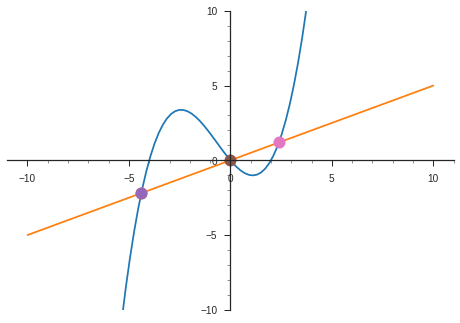

In [57]:
ax.plot( r1, f(r1), 'o',MarkerSize=12 )
ax.plot( r2, f(r2), 'o',MarkerSize=12 )
ax.plot( r3, f(r3), 'o',MarkerSize=12 )
fig

### Compare accuracy with `roots`

Be careful: despite a similar sounding name, [`numpy.roots`](https://numpy.org/doc/stable/reference/generated/numpy.roots.html) is **only for polynomials**.

With a bit of pen-and-paper manipulation, you can cast the above intersection problem as one of finding the roots of a polynomial.  Do this, and then find the roots via `numpy.roots`.

- How can you evaluate the accuracy of your answer?
- Which method (`scipy.optimize.root_scalar` vs `numpy.roots`) is more accurate?


In [62]:
# Make the polynomial we want to find roots of (i.e., find the coefficients)

coeff = np.poly( (2,0,-4) )  # coefficients of (x-2)*x*(x+4)
# and don't forget to multiply by 0.2
coeff = 0.2*coeff
# and subtract the g(x) function, so -.5*x.  This is the 2nd-to-last coefficient
coeff[-2] -=.5
coeff

array([ 0.2,  0.4, -2.1,  0. ])

In [65]:
r_numpy = np.roots( coeff )
r_numpy

array([-4.39116499,  2.39116499,  0.        ])

In [73]:
r_scipy = np.array( (r1,r3,r2 ))  # changed ordering to match np.roots output

residual = lambda x : abs( f(x) - g(x) )
for r_n, r_s in zip(r_numpy,r_scipy):
    print("At root {:5.2f}, the residual using np.roots is {:.2e}, and using root_scalar is {:.2e}".format( r_n, residual(r_n), residual(r_s)) )

At root -4.39, the residual using np.roots is 2.66e-15, and using root_scalar is 2.66e-15
At root  2.39, the residual using np.roots is 2.22e-16, and using root_scalar is 1.33e-15
At root  0.00, the residual using np.roots is 0.00e+00, and using root_scalar is 0.00e+00


Conclusion: in this example, both root finding libraries work just fine